<a href="https://colab.research.google.com/github/maulanazh15/data-mining/blob/main/Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraray Utama Pendukung Data Mining


In [ ]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")




Mounted at /content/drive/


Melihat Dataset Teratas


In [ ]:
# Load dataset
dataset = pd.read_csv('/content/drive/MyDrive/Project_Data_Mining/Covid_Dataset.csv')

dataset.head()


,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes


Informasi mengenai jumlah dataset


In [ ]:
dataset.describe()


,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
count,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,...,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,1,1,2
top,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,No,...,Yes,No,No,Yes,No,Yes,No,No,No,Yes
freq,3620,4273,4307,3953,2952,2920,2869,2736,2911,2846,...,2821,2883,2983,2726,2924,2820,3172,5434,5434,4383


Informasi tipe data pada tiap kolom


In [ ]:
dataset.shape

(5434, 21)

Pre Processing data


In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
kolom_terpilih = ['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat', 'Running Nose', 'Headache',
                  'Abroad travel', 'Contact with COVID Patient', 'Attended Large Gathering', 'Visited Public Exposed Places', 'Fatigue']

# Preprocessing data

X = dataset[kolom_terpilih].values
y = dataset['COVID-19']

X = pd.DataFrame(X)

boolean_cols = X.select_dtypes(include='object').columns

# Melakukan one-hot encoding pada kolom boolean
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[boolean_cols]))

# Menyatukan kembali data yang telah di-encode dengan data lainnya
X = pd.concat([X.drop(boolean_cols, axis=1), X_encoded], axis=1)

le = LabelEncoder()
y = le.fit_transform(y)

skb = SelectKBest(chi2, k=8)
X_selected = skb.fit_transform(X, y)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# X_selected.shape

(5434, 8)

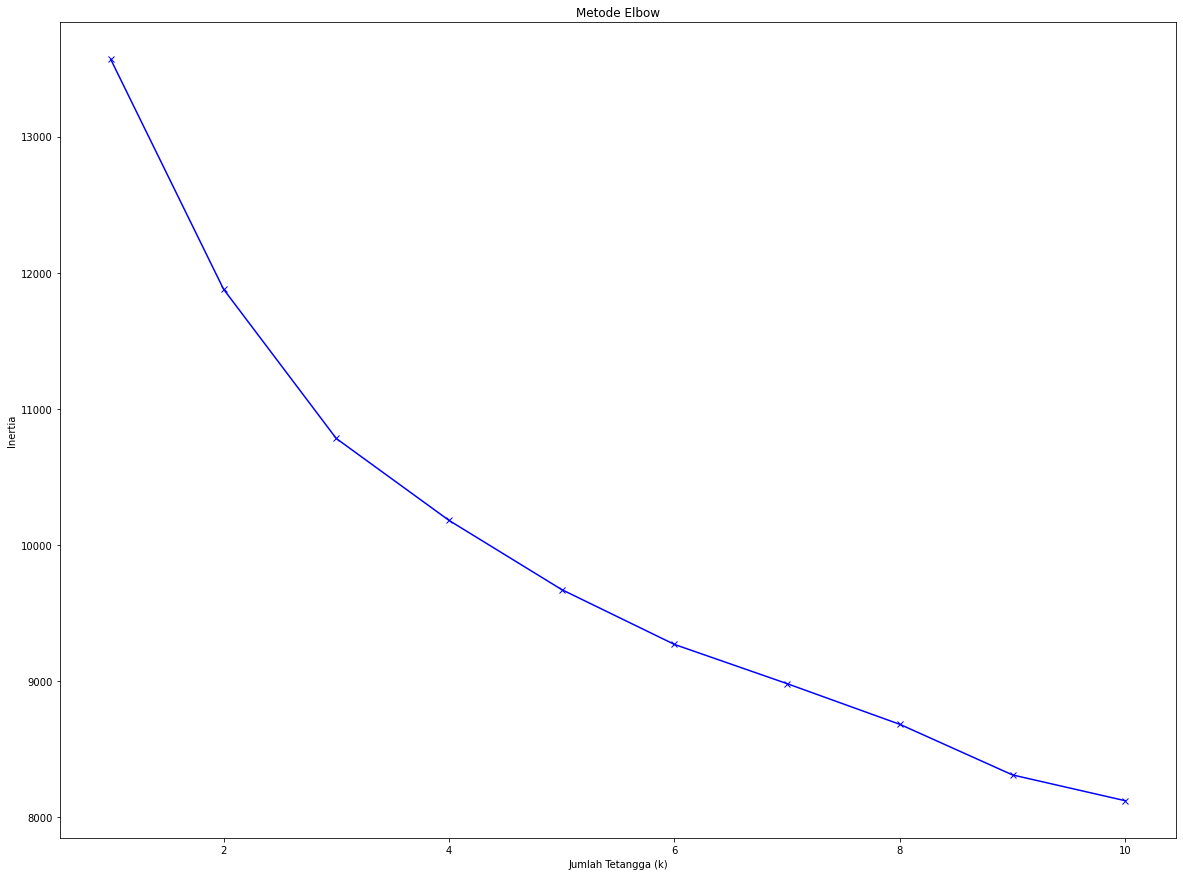

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_values = range(1, 11)  # Coba nilai k dari 1 hingga 10
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Menggunakan metode elbow untuk menentukan k yang tepat
plt.figure(figsize=(12, 10))
plt.plot(k_values, inertia, 'bx-')
plt.xlabel('Jumlah Tetangga (k)')
plt.ylabel('Inertia')
plt.title('Metode Elbow')
plt.show()

In [ ]:
# kmeans = KMeans(n_clusters=3).fit(X)
# X['labels'] = kmeans.labels_

# skb = SelectKBest(chi2, k='all')
# X_selected = skb.fit_transform(X, y)

***GaussianNB dengan Ensambel Model dengan Var Smoothin yang berbeda***

Akurasi Ensemble Model: 0.9613615455381784
Confusion Matrix:
[[196   7]
 [ 35 849]]
Cross-Validation Scores: [0.874885   0.98712052 0.87304508 0.77736891 0.93278085]
Mean Accuracy: 0.889040070073072
Standard Deviation: 0.06994238198567918


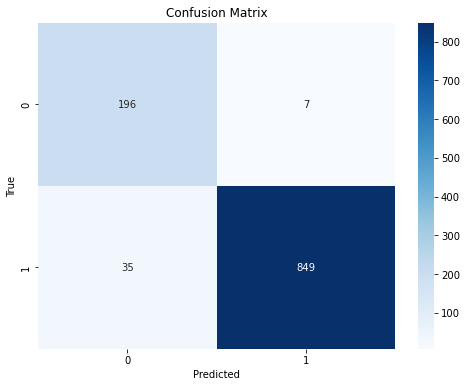

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# # Generate synthetic dataset
# X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42)

# Create individual Naive Bayes models
model1 = GaussianNB(var_smoothing=0.1)
model2 = GaussianNB(var_smoothing=0.01)
model3 = GaussianNB(var_smoothing=0.001)

# Create Voting Classifier
voting_model = VotingClassifier(estimators=[(
    'model1', model1), ('model2', model2), ('model3', model3)], voting='hard')

# Fit the ensemble model
voting_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = voting_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi Ensemble Model:", accuracy)

# Membuat confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

scores = cross_val_score(voting_model, X, y, cv=5)

# Menampilkan hasil cross-validation
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", np.mean(scores))
print("Standard Deviation:", np.std(scores))

# Menampilkan confusion matrix dalam bentuk heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

***Analisis Akurasi Berbagai Algoritma Naive Bayes***

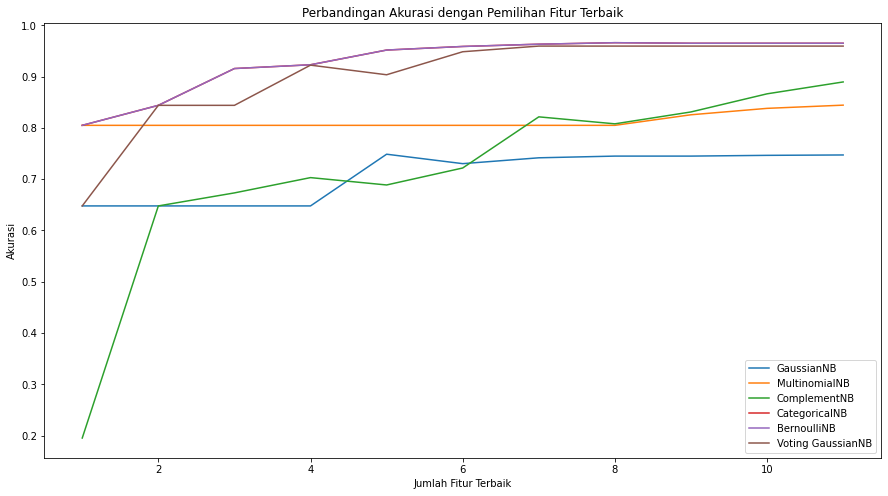

[0.6477732793522267, 0.6477732793522267, 0.6477732793522267, 0.6477732793522267, 0.7486198012513802, 0.7302171512697828, 0.7416267942583732, 0.7449392712550608, 0.7449392712550608, 0.7464114832535885, 0.7471475892528524] 
 [0.804931910195068, 0.804931910195068, 0.804931910195068, 0.804931910195068, 0.804931910195068, 0.804931910195068, 0.804931910195068, 0.804931910195068, 0.8255428781744572, 0.8380566801619433, 0.8443135811556864] 
 [0.1950680898049319, 0.6477732793522267, 0.6731689363268311, 0.7029812292970188, 0.6886271623113729, 0.7217519322782481, 0.8214942951785057, 0.8078763341921237, 0.8310636731689364, 0.8663967611336032, 0.8895841001104159] 
 [0.804931910195068, 0.8439455281560545, 0.9157158630842841, 0.9230769230769231, 0.9517850570482149, 0.9587780640412219, 0.9631947000368053, 0.9661391240338609, 0.965034965034965, 0.965034965034965, 0.965034965034965] 
 [0.804931910195068, 0.8439455281560545, 0.9157158630842841, 0.9230769230769231, 0.9517850570482149, 0.9587780640412219, 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, CategoricalNB, BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


# Inisialisasi jumlah fitur terbaik yang akan diuji
k_values = range(1, 12)  # Coba dari 1 hingga 10 fitur terbaik

# Inisialisasi list untuk menyimpan akurasi dari masing-masing algoritma
gaussian_acc = []
multinomial_acc = []
complement_acc = []
categorical_acc = []
bernoulli_acc = []
votingGNB_acc = []

# Melakukan seleksi fitur dan pengujian pada masing-masing algoritma
for k in k_values:
    # Menggunakan SelectKBest untuk memilih k fitur terbaik menggunakan metode chi2
    skb = SelectKBest(chi2, k=k)
    X_selected = skb.fit_transform(X, y)

    # Membagi data menjadi data latih dan data uji
    X_train, X_test, y_train, y_test = train_test_split(
        X_selected, y, test_size=0.5, random_state=42)

    # Membangun model Gaussian Naive Bayes
    gaussian_model = GaussianNB()
    gaussian_model.fit(X_train, y_train)
    y_pred_gaussian = gaussian_model.predict(X_test)
    gaussian_accuracy = accuracy_score(y_test, y_pred_gaussian)
    gaussian_acc.append(gaussian_accuracy)

    # Membangun model Multinomial Naive Bayes
    multinomial_model = MultinomialNB(alpha=0.1)
    multinomial_model.fit(X_train, y_train)
    y_pred_multinomial = multinomial_model.predict(X_test)
    multinomial_accuracy = accuracy_score(y_test, y_pred_multinomial)
    multinomial_acc.append(multinomial_accuracy)

    # Membangun model Complement Naive Bayes
    complement_model = ComplementNB(alpha=0.1)
    complement_model.fit(X_train, y_train)
    y_pred_complement = complement_model.predict(X_test)
    complement_accuracy = accuracy_score(y_test, y_pred_complement)
    complement_acc.append(complement_accuracy)

    # Membangun model Categorical Naive Bayes
    categorical_model = CategoricalNB(alpha=0.001)
    categorical_model.fit(X_train, y_train)
    y_pred_categorical = categorical_model.predict(X_test)
    categorical_accuracy = accuracy_score(y_test, y_pred_categorical)
    categorical_acc.append(categorical_accuracy)

    # Membangun model Bernoulli Naive Bayes
    bernoulli_model = BernoulliNB(alpha=0.001)
    bernoulli_model.fit(X_train, y_train)
    y_pred_bernoulli = bernoulli_model.predict(X_test)
    bernoulli_accuracy = accuracy_score(y_test, y_pred_bernoulli)
    bernoulli_acc.append(bernoulli_accuracy)

    # Membangun model dengan Voting Gaussian Naive Bayes
    voting_model.fit(X_train, y_train)
    y_pred_votingGNB = voting_model.predict(X_test)
    votingGNB_accuracy = accuracy_score(y_test, y_pred_votingGNB)
    votingGNB_acc.append(votingGNB_accuracy)

# Plotting hasil perbandingan akurasi
plt.figure(figsize=(15, 8))
plt.plot(k_values, gaussian_acc, label='GaussianNB')
plt.plot(k_values, multinomial_acc, label='MultinomialNB')
plt.plot(k_values, complement_acc, label='ComplementNB')
plt.plot(k_values, categorical_acc, label='CategoricalNB')
plt.plot(k_values, bernoulli_acc, label='BernoulliNB')
plt.plot(k_values, votingGNB_acc, label='Voting GaussianNB')
plt.xlabel('Jumlah Fitur Terbaik')
plt.ylabel('Akurasi')
plt.title('Perbandingan Akurasi dengan Pemilihan Fitur Terbaik')
plt.legend()
plt.show()
print(gaussian_acc,"\n",multinomial_acc,"\n",complement_acc,"\n",categorical_acc,"\n",bernoulli_acc,"\n",votingGNB_acc)

**CategoricalNB**


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42)


# categorical_model = CategoricalNB(force_alpha=True)
categorical_model = CategoricalNB(alpha=0.001)

categorical_model.fit(X_train, y_train)
y_pred_categorical = categorical_model.predict(X_test)
categorical_accuracy = accuracy_score(y_test, y_pred_categorical)

accuracy = accuracy_score(y_test, y_pred_categorical)
print("Akurasi:", accuracy)

scores = cross_val_score(categorical_model, X_selected, y, cv=5)

# Menampilkan hasil cross-validation
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", np.mean(scores))
print("Standard Deviation:", np.std(scores))


Akurasi: 0.9779208831646734
Cross-Validation Scores: [0.92824287 1.         0.9374425  0.90800368 0.91436464]
Mean Accuracy: 0.9376107386643762
Standard Deviation: 0.03285472320667608


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42)

bernoulli_model = BernoulliNB(alpha=0.001)
bernoulli_model.fit(X_train, y_train)
y_pred_bernoulli = bernoulli_model.predict(X_test)
bernoulli_accuracy = accuracy_score(y_test, y_pred_bernoulli)

accuracy = accuracy_score(y_test, y_pred_bernoulli)
print("Akurasi:", accuracy)

scores = cross_val_score(bernoulli_model, X_selected, y, cv=5)

# Menampilkan hasil cross-validation
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", np.mean(scores))
print("Standard Deviation:", np.std(scores))


Akurasi: 0.9779208831646734
Cross-Validation Scores: [0.92824287 1.         0.9374425  0.90800368 0.91436464]
Mean Accuracy: 0.9376107386643762
Standard Deviation: 0.03285472320667608


***Gaussian NB tanpa var_smoothing***

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42)

gaussian_model = GaussianNB()

gaussian_model.fit(X_train, y_train)
y_pred = gaussian_model.predict(X_test)
gaussian_accuracy = accuracy_score(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

scores = cross_val_score(gaussian_model, X_selected, y, cv=5)

# Menampilkan hasil cross-validation
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", np.mean(scores))
print("Standard Deviation:", np.std(scores))

Akurasi: 0.7893284268629255
Cross-Validation Scores: [0.81048758 0.78932843 0.66329347 0.58877645 0.89134438]
Mean Accuracy: 0.7486460615240216
Standard Deviation: 0.10833798732722527


***Gaussian NB dengan var_smoothing***

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42)

gaussian_model = GaussianNB(var_smoothing=0.1)

gaussian_model.fit(X_train, y_train)
y_pred = gaussian_model.predict(X_test)
gaussian_accuracy = accuracy_score(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

scores = cross_val_score(gaussian_model, X_selected, y, cv=5)

# Menampilkan hasil cross-validation
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", np.mean(scores))
print("Standard Deviation:", np.std(scores))


Akurasi: 0.9613615455381784
Cross-Validation Scores: [0.90984361 1.         0.87120515 0.8325667  0.93278085]
Mean Accuracy: 0.9092792605054545
Standard Deviation: 0.056775612260836175


In [ ]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42)

# Membangun model base (CategoricalNB)
base_model = CategoricalNB(alpha=0.000001)

# Membangun model dengan teknik boosting (AdaBoost)
boosting_model = AdaBoostClassifier(
    base_model, n_estimators=50, random_state=42)

# Melakukan training pada data latih
boosting_model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = boosting_model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)


Akurasi: 0.9613615455381784


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42)

# Membangun model base (CategoricalNB)
base_model = CategoricalNB(alpha=0.000001)

# List untuk menyimpan akurasi
accuracy_scores = []

# Coba beberapa nilai n_estimators
n_estimators_values = [i for i in range(1, 30)]

for n_estimators in n_estimators_values:
    # Membangun model dengan teknik bagging dan jumlah estimator yang ditentukan
    bagging_model = BaggingClassifier(
        base_model, n_estimators=n_estimators, random_state=42)

    # Melakukan training pada data latih
    bagging_model.fit(X_train, y_train)

    # Melakukan prediksi pada data uji
    y_pred = bagging_model.predict(X_test)

    # Menghitung akurasi
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    print("n_estimators:", n_estimators, "| Akurasi:", accuracy)

# Cetak hasil akurasi untuk setiap nilai n_estimators
for i in range(len(n_estimators_values)):
    print("n_estimators:",
          n_estimators_values[i], "| Akurasi:", accuracy_scores[i])


n_estimators: 1 | Akurasi: 0.9779208831646734
n_estimators: 2 | Akurasi: 0.9779208831646734
n_estimators: 3 | Akurasi: 0.9779208831646734
n_estimators: 4 | Akurasi: 0.9779208831646734
n_estimators: 5 | Akurasi: 0.9779208831646734
n_estimators: 6 | Akurasi: 0.9714811407543699
n_estimators: 7 | Akurasi: 0.9714811407543699
n_estimators: 8 | Akurasi: 0.9779208831646734
n_estimators: 9 | Akurasi: 0.9779208831646734
n_estimators: 10 | Akurasi: 0.9779208831646734
n_estimators: 11 | Akurasi: 0.9779208831646734
n_estimators: 12 | Akurasi: 0.9779208831646734
n_estimators: 13 | Akurasi: 0.9779208831646734
n_estimators: 14 | Akurasi: 0.9779208831646734
n_estimators: 15 | Akurasi: 0.9779208831646734
n_estimators: 16 | Akurasi: 0.9779208831646734
n_estimators: 17 | Akurasi: 0.9779208831646734
n_estimators: 18 | Akurasi: 0.9779208831646734
n_estimators: 19 | Akurasi: 0.9779208831646734
n_estimators: 20 | Akurasi: 0.9779208831646734
n_estimators: 21 | Akurasi: 0.9779208831646734
n_estimators: 22 | Aku

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k_values = range(1, 21)  # Coba dari 1 hingga 20 jumlah tetangga terdekat

best_accuracy = 0.0
best_k = 0
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42)
for k in k_values:
    # Membangun model KNN dengan jumlah tetangga terdekat k
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)

    # Melakukan prediksi pada data uji
    y_pred = model.predict(X_test)

    # Menghitung akurasi
    accuracy = accuracy_score(y_test, y_pred)

    # Memeriksa apakah akurasi saat ini lebih baik daripada yang sebelumnya
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

    # Menampilkan hasil akurasi untuk setiap nilai k
    print("k =", k, "Akurasi:", accuracy)

print("=================================")
print("Nilai k terbaik:", best_k)
print("Akurasi terbaik:", best_accuracy)


k = 1 Akurasi: 0.9484820607175714
k = 2 Akurasi: 0.9438822447102115
k = 3 Akurasi: 0.9512419503219871
k = 4 Akurasi: 0.952161913523459
k = 5 Akurasi: 0.9770009199632015
k = 6 Akurasi: 0.9733210671573137
k = 7 Akurasi: 0.9770009199632015
k = 8 Akurasi: 0.9760809567617296
k = 9 Akurasi: 0.9770009199632015
k = 10 Akurasi: 0.9760809567617296
k = 11 Akurasi: 0.9770009199632015
k = 12 Akurasi: 0.9770009199632015
k = 13 Akurasi: 0.9770009199632015
k = 14 Akurasi: 0.9760809567617296
k = 15 Akurasi: 0.9770009199632015
k = 16 Akurasi: 0.9760809567617296
k = 17 Akurasi: 0.9770009199632015
k = 18 Akurasi: 0.9760809567617296
k = 19 Akurasi: 0.9760809567617296
k = 20 Akurasi: 0.9760809567617296
Nilai k terbaik: 5
Akurasi terbaik: 0.9770009199632015


**KNN**


Akurasi: 0.9770009199632015
Confusion Matrix:
[[187  16]
 [  9 875]]


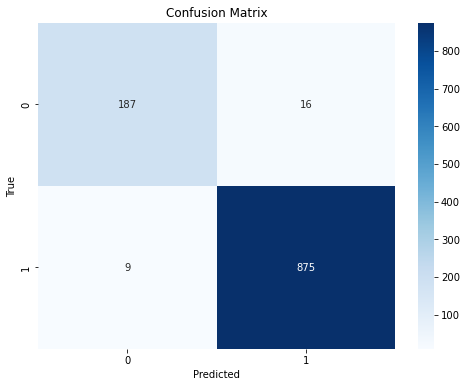

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42)

k = 5  # Jumlah tetangga terdekat yang akan digunakan
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

# Membuat confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Menampilkan confusion matrix dalam bentuk heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


**DecisionTree**


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42)

# Membangun model klasifikasi
model = DecisionTreeClassifier(criterion='entropy')

model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

scores = cross_val_score(model, X_selected, y, cv=5)

# Menampilkan hasil cross-validation
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", np.mean(scores))
print("Standard Deviation:", np.std(scores))


Akurasi: 0.9714811407543699
Cross-Validation Scores: [0.93100276 1.         0.84636615 0.7424103  0.71823204]
Mean Accuracy: 0.8476022506061083
Standard Deviation: 0.10768866509396374


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42)

# Membangun model klasifikasi
model = DecisionTreeClassifier(criterion='gini')
model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

scores = cross_val_score(model, X_selected, y, cv=5)

# Menampilkan hasil cross-validation
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", np.mean(scores))
print("Standard Deviation:", np.std(scores))

Akurasi: 0.9714811407543699
Cross-Validation Scores: [0.93100276 1.         0.84636615 0.7424103  0.67219153]
Mean Accuracy: 0.8383941474753532
Standard Deviation: 0.119659991843873


**Neural Network dengan MLP(Multi Layer Percepton)**


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


# Split data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42)

# Normalisasi fitur menggunakan StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# Inisialisasi model Neural Network
model = MLPClassifier(hidden_layer_sizes=(100, 60),
                      activation='relu', solver='adam', random_state=42)

# Melatih model Neural Network
model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi Neural Network:", accuracy)

scores = cross_val_score(model, X_selected, y, cv=5)

# Menampilkan hasil cross-validation
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", np.mean(scores))
print("Standard Deviation:", np.std(scores))


Akurasi Neural Network: 0.9760809567617296
Cross-Validation Scores: [0.93100276 1.         0.87120515 0.81968721 0.87292818]
Mean Accuracy: 0.8989646601981225
Standard Deviation: 0.061592178411289895


**XGB**


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score


# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42)

# Inisialisasi model XGBoost
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# parameter terbaik sementra {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 1000}

# Definisikan parameter yang akan di-tune
param_grid = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 500, 1000],
    
}

# Buat objek GridSearchCV
grid_search = GridSearchCV(
    estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')

# Lakukan tuning pada data latih
grid_search.fit(X_train, y_train)

# Cetak parameter terbaik yang ditemukan
print("Parameter Terbaik:", grid_search.best_params_)

# Prediksi menggunakan model dengan parameter terbaik
y_pred = grid_search.predict(X_test)

# Evaluasi akurasi prediksi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)


Parameter Terbaik: {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 100}
Akurasi: 0.9714811407543699


***SVM***

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Membangun model SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = svm_model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)


Akurasi: 0.9733210671573137


***Perbandingan Separasi Data dengan Akurasinya antar algortima***

No handles with labels found to put in legend.


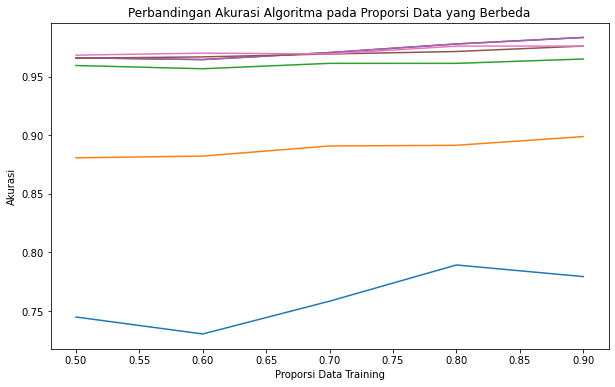

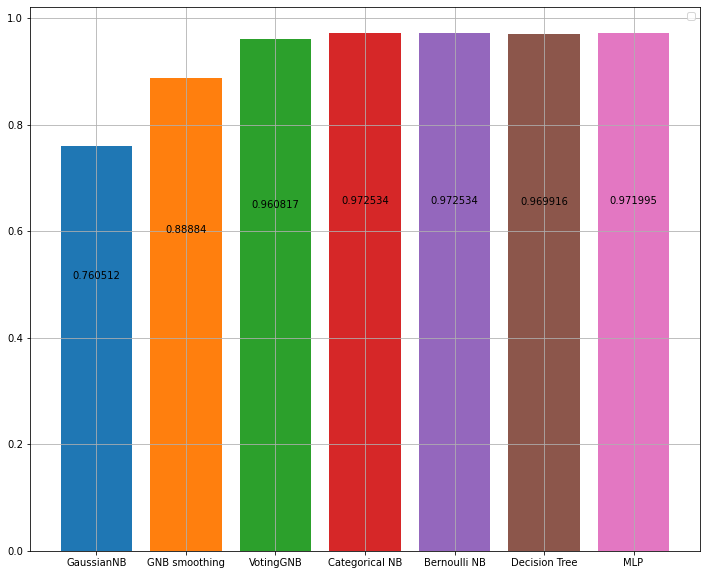

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, CategoricalNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

kolom_terpilih = ['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat', 'Running Nose', 'Headache',
                  'Abroad travel', 'Contact with COVID Patient', 'Attended Large Gathering', 'Visited Public Exposed Places', 'Fatigue']

# Preprocessing data

X = dataset[kolom_terpilih].values
y = dataset['COVID-19']

X = pd.DataFrame(X)

boolean_cols = X.select_dtypes(include='object').columns

# Melakukan one-hot encoding pada kolom boolean
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[boolean_cols]))

# Menyatukan kembali data yang telah di-encode dengan data lainnya
X = pd.concat([X.drop(boolean_cols, axis=1), X_encoded], axis=1)

le = LabelEncoder()
y = le.fit_transform(y)

skb = SelectKBest(chi2, k=8)
X_selected = skb.fit_transform(X, y)

# Daftar algoritma yang akan diuji
algorithms = {
    'GaussianNB' : GaussianNB(),
    'GNB smoothing' : GaussianNB(var_smoothing=0.0001),
    'VotingGNB' : voting_model,
    'Categorical NB':CategoricalNB(alpha=0.0001),
    'Bernoulli NB': BernoulliNB(alpha=0.0001),
    'Decision Tree': DecisionTreeClassifier(criterion='entropy'),
    'MLP' : MLPClassifier(hidden_layer_sizes=(100, 60),
                      activation='relu', solver='adam', random_state=42),
}

# Daftar proporsi pemisahan data yang akan diuji
train_sizes = [0.5, 0.6, 0.7, 0.8, 0.9]

# Inisialisasi dictionary untuk menyimpan akurasi masing-masing algoritma
accuracy_scores = {algorithm: [] for algorithm in algorithms}

# Lakukan pemisahan data dan evaluasi untuk setiap proporsi
for train_size in train_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, train_size=train_size, random_state=42)
    
    for algorithm_name, algorithm in algorithms.items():
        algorithm.fit(X_train, y_train)
        y_pred = algorithm.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores[algorithm_name].append(accuracy)

# Gambar grafik hasil perbandingan akurasi
plt.figure(figsize=(10, 6))

for algorithm_name, accuracies in accuracy_scores.items():
    plt.plot(train_sizes, accuracies, label=algorithm_name)

plt.title('Perbandingan Akurasi Algoritma pada Proporsi Data yang Berbeda')
plt.xlabel('Proporsi Data Training')
plt.ylabel('Akurasi')
plt.legend()
plt.grid(True)
plt.show()

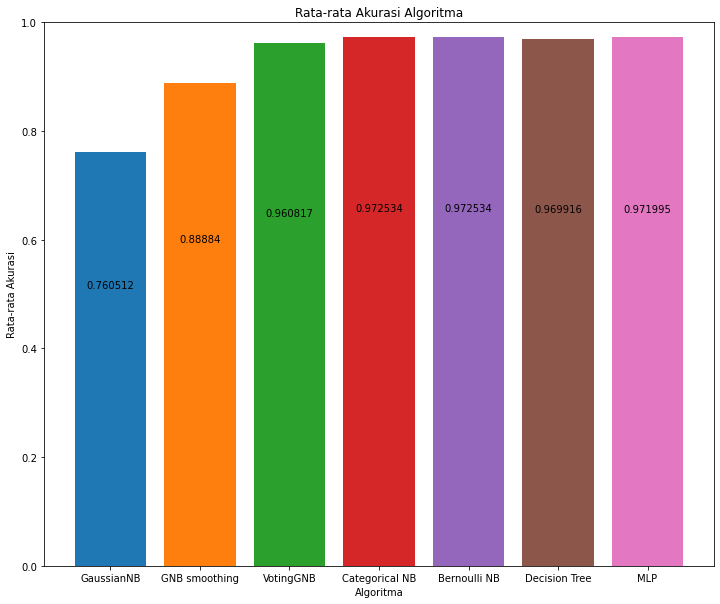

In [ ]:
# Menghitung rata-rata akurasi tiap algoritma
average_scores = {algorithm: np.mean(scores) for algorithm, scores in accuracy_scores.items()}
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
# Plot grafik rata-rata akurasi
plt.figure(figsize=(12, 10))
plt.bar(average_scores.keys(), average_scores.values(), color=colors)
plt.title('Rata-rata Akurasi Algoritma')
plt.xlabel('Algoritma')
plt.ylabel('Rata-rata Akurasi')
plt.ylim(0, 1)
for i, j in enumerate(average_scores.values()):
    plt.text(i, j/1.5, str(round(j, 6)), ha='center', va='bottom')
# plt.grid(True)
plt.show()